# Linear Regression

<p>
Mal Minhas, v0.1<br>
23.12.22
</p>

## Importing the data from a csv file

Let's start with a collection of data in a .csv file which contains the hours studied by a group of students and the scores obtained based on those hours.  The corresponding source file is linked in [this article](https://stackabuse.com/linear-regression-in-python-with-scikit-learn/) and is downloadable [here](https://drive.google.com/open?id=1oakZCv7g3mlmCSdv9J8kdSaqO5_6dIOw).  Using the python [`pandas`](https://pandas.pydata.org/) library we can read the csv data into a `dataframe`.  A dataframe is like a spreadsheet which which is addressable with python code.   By convention we import `pandas` as `pd`.  We can then load a csv directly into a `pandas` dataframe as follows:

In [2]:
import pandas as pd
df = pd.read_csv('scores.csv')

Let's have a look at what is in the dataframe:

In [3]:
print(f'number of rows by number of columns is {df.shape} with columns={df.columns.values}') 

number of rows by number of columns is (25, 2) with columns=['Hours' 'Scores']


Let's look at the first row of the dataframe:

In [4]:
df.head(1)

,Hours,Scores
0,2.5,21


Let's have a look at the fourth row using `pandas` `iloc` integer based indexing - note that in `pandas` as with lots of code libraries, the first element is 0:

In [5]:
df.iloc[3,:]

Hours      8.5
Scores    75.0
Name: 3, dtype: float64

## Plotting the data

Let's plot the dataframe in a scatter graph using the built-in `plot` method on a dataframe:

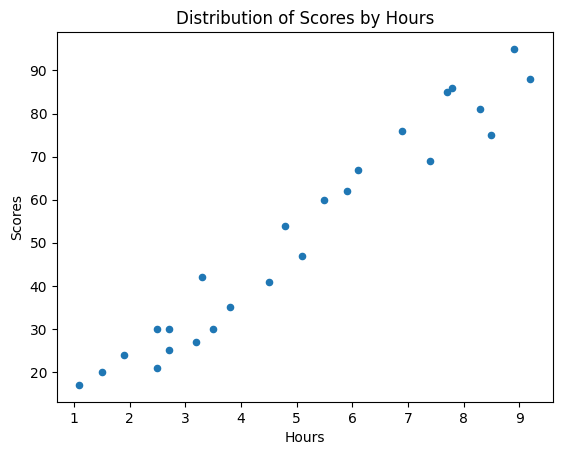

In [6]:
_ = df.plot(kind='scatter', x='Hours', y='Scores', title=f'Distribution of Scores by Hours')

We can list various statistical qualities of this distribution such as the maximum, mean, minimum and standard deviation using the `describe` method:

In [7]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


## Linear Regression

Now let's try and draw a straight line through the results.  We will use `scikit-learn` for this.  `scikit-learn` is a machine learning library in Python.  You can find out more about `scikit-learn` [here](https://scikit-learn.org/stable/).  To install it you need to `pip install scikit-learn`.  In order to use `scikit-learn`, however, you install it as `sklearn`.  This may sound a bit confusing but in case you are interested in the reason why, check out [this article](https://towardsdatascience.com/scikit-learn-vs-sklearn-6944b9dc1736).  We are interested in using the `LinearRegressor` model from `scikit-learn`.  In order to do so we need to reshape the input data.  Iin the following code we are reshaping the series of values for both `X` (Scores) and `y` (Hours) from a 1xN row vector into an Nx1 column matrix as follows:

$\ [[{v}_{0}, ... {v}_{n}]] -> [[{v}_{0}], ... [{v}_{n}]] $

We could use `numpy` to convert our Scores and Hours values into a 1xN `array` and then transpose it:

In [32]:
import numpy as np

scores = df.Scores.values
y = np.array([df.Scores.values])
print(f'We can transpose {y.shape} row vector into {y.T.shape} column vector')

We can transpose (1, 25) row vector into (25, 1) column vector


Or we can use `reshape` on our `numpy` `array`.  Note that if a shape dimension is -1, the value is inferred from the length of the array and remaining dimensions.

In [34]:
df['Scores'].values.reshape(-1, 1).shape

(25, 1)

We also split our initial data values into separate training and test sets with 20% split:

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# 1. reshape Scores and Hours into column vectors.  The -1 here means 
y = df['Scores'].values.reshape(-1, 1)
X = df['Hours'].values.reshape(-1, 1)
seed = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = seed)
regressor = LinearRegression()
_ = regressor.fit(X_train, y_train)

We can now use our fitted `regressor` instance which holds our line of best fit to extract our corresponding gradient and intercept:

In [30]:
gradient = regressor.coef_[0][0]
intercept = regressor.intercept_[0]
print(f'slope is {gradient} and intercept is {intercept}')

slope is 9.682078154455697 and intercept is 2.826892353899737


Our straight line graph is as follows:

$\ {score} = {gradient} * {hours} + {intercept} $

Now let's make a prediction using the gradient and the intercept calculated by the `regressor` for an input value of 9.5 hours:

In [9]:
def calculateScore(gradient, intercept, hours):
    return round(gradient * hours + intercept, 4)

calculateScore(gradient, intercept, 9.5)

94.8066

We can now make predictions using our `regressor` for all the original 25 values.  These predictions will populate a new `pandas` dataframe called `df_preds` which also houses the actual results.  We will print the first 5 values in this new dataframe:

In [10]:
y_pred = regressor.predict(X)
df_preds = pd.DataFrame({'ActualScore': y.squeeze(), 'PredictedScore': y_pred.squeeze(), 'Hours':X.squeeze()})
df_preds.head()

,ActualScore,PredictedScore,Hours
0,21,27.032088,2.5
1,47,52.205491,5.1
2,27,33.809542,3.2
3,75,85.124557,8.5
4,30,36.714166,3.5


We can use these values to generate a straight line graph which we plot on top of the `pandas` `plot` of the actual results in `df_pred` as follows:

<AxesSubplot: xlabel='Hours', ylabel='ActualScore'>

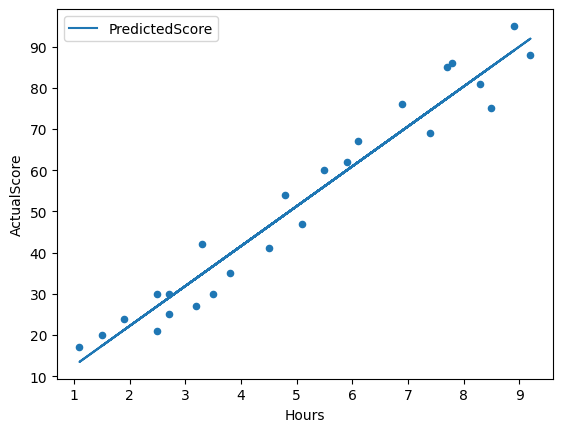

In [11]:
ax = df_preds.plot(kind='scatter', x='Hours', y='ActualScore')
df_preds.plot(kind='line', ax=ax, x='Hours', y='PredictedScore')

## Using Seaborn

The previous graphs were generated with `matplotlib`.  Here we will use [`seaborn`](https://seaborn.pydata.org/), a Python visualisation library which extends `matplotlib` and can also be used by `pandas` for internal plotting.  By convention we import `seaborn` as `sns` and we can generate a scatterplot of our actual results with it as follows:

[Text(0.5, 1.0, 'Scatter plot of Scores by Hours')]

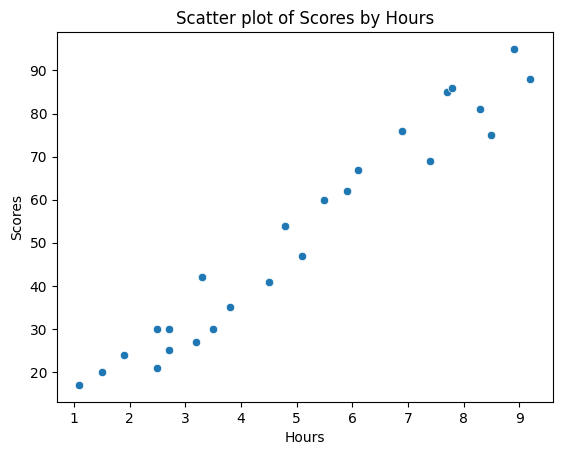

In [12]:
import seaborn as sns 

sns.scatterplot(x='Hours', y='Scores', data=df).set(title=f'Scatter plot of Scores by Hours')

We can plot our regression line in one line of code with `seaborn` along with error bars as follows:

[Text(0.5, 1.0, 'Regression plot of Scores by Hours')]

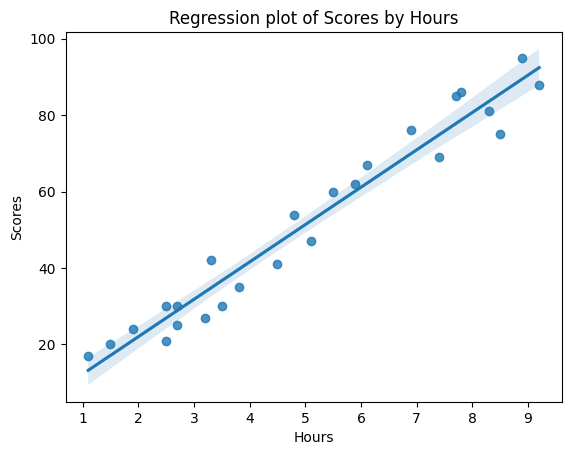

In [13]:
# Seaborn Regression Plot also by default includes best-fitting regression line which can be turned off via `fit_reg=False`
sns.regplot(x='Hours', y='Scores', data=df).set(title=f'Regression plot of Scores by Hours')

We can also calculate the correlation of the variables, this time using `seaborn` `heatmap()` to help us spot the strongest and weaker correlations based on warmer (reds) and cooler (blues) tones:

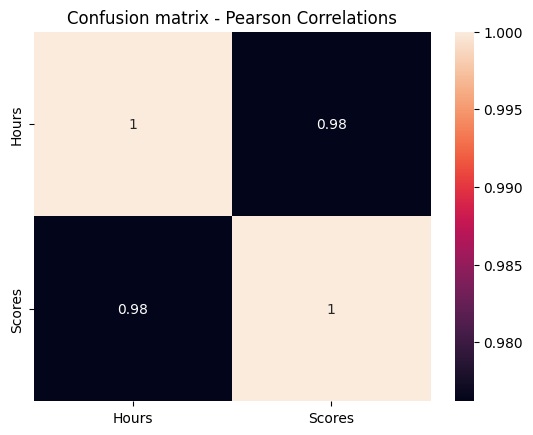

In [14]:
correlations = df.corr()
# annot=True displays the correlation values
_ = sns.heatmap(correlations, annot=True).set(title='Confusion matrix - Pearson Correlations')